# Introduction to neural networks

CREDIT: This practical was inspired by [this Kaggle notebook on neural networks](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras).

## Setup
### Imports

In [ ]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement

### Neural-networks-related imports

There are two main libraries to work with neural networks in Python: `pytorch` (developed by Meta/Facebook) and `tensorflow` (developed by Google).
In this practical, we will work with `tensorflow`, and more specifically with a library that makes it easier to use: `keras`.
The relevant imports are listed below.

In [ ]:
# Neural network libraries

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam, RMSprop
from keras import  backend as K

In [ ]:
# Ensuring reproductibility

import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Importing and observing the data

For this introduction to neural networks, we will be working with the well-known MNIST handwritten digits dataset.
This dataset can be imported directly from `keras`. You'll note that, unlike `scikit-learn`, `keras` already separates the data into a training and test set.

Once you have imported the data, answer the following questions:
1. What are the shapes of `x_train`, `y_train`, `x_test`, `y_test`? What does it mean?
2. What is the proportion of test data?
3. How many classes are there? What are they? Are they balanced?

In [ ]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
#1. Shape of the datasets

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#2. Proportion of test data

print(len(x_test)/(len(x_train)+len(x_test)))

0.14285714285714285


In [ ]:
#3. Class imbalance

print(pd.DataFrame(y_train).value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


**Answers**

1. The first component of the datasets' shape represent the number of observation. The second and third components indicate the number resolution of the image. The product of these components is equal to the number of pixels coding each image.

2. The proportion of test data is 14%.

3. There are ten classes. The dataset is slightly imbalaced (5421 observations in the minority class versus 6742 in the majority class).

The code below will let you visualize random samples from the training dataset.

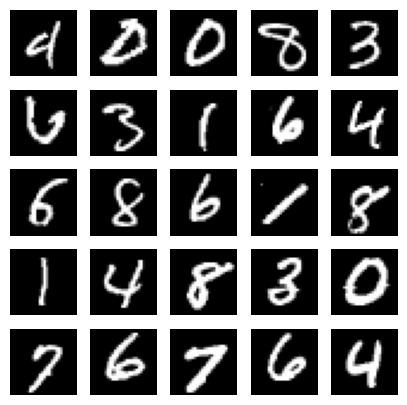

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

## Preparing the data

1. Determine the minimum and maximum value for pixels in the image.
2. Scale `x_train` and `x_test` to make sure their values remain between 0 and 1. This prevents gradients from becoming too large during backpropagation.
3. Reshape the matrices so that every input is 1D. For example, `x_train`'s shape should be `(number of samples, size of an image)`.

We want the network to output a probability for each class. Therefore, the current representation of labels is not suitable. We need to convert the current labels into binary vectors of size 10. This is called [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)

4. Using the `to_categorical` function, perform one-hot encoding for `y_train` and `y_test`.

Your data is not ready to be used in a neural network!


In [ ]:
#1. Min and Max value for pixels

Min_train = np.amin(x_train)
Max_train = np.amax(x_train)
Min_test = np.amin(x_test)
Max_test = np.amax(x_test)

print(Min_train)
print(Max_train)
print(Min_test)
print(Max_test)

#2. Scaling

x_train = x_train/255
x_test = x_test/255

0
255
0
255


In [ ]:
#3. Reshape

x_train = np.reshape(x_train,(60000,784))
x_test = np.reshape(x_test,(10000,784))

In [ ]:
#4. One-hot encoding

import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Building the network

In this section, we will build a neural network using `keras`.

In the following cell, we define some parameters that will be used in the network.

In [ ]:
batch_size = 128 # indicates the number of data that we will use for each update of the model parameters
hidden_units = 256 # number of units in the hidden layers
dropout = 0.45 # dropout rate

We will build the network in the following cell. Using the examples provided, complete the network architecture.

In [ ]:
model = Sequential() # initialize the network as a sequence of layers
model.add(Dense(hidden_units, input_dim=28*28)) # input_dim corresponds to the input size, i.e. the number of pixels
model.add(Activation('relu')) # defines the activation function
model.add(Dropout(dropout)) # dropout layers randomly sets input units to 0 to prevent overfitting
model.add(Dense(hidden_units)) # add another dense layer here with the same number of units (the input_dim parameter is not required this time)
model.add(Activation('relu')) # add another relu activation function
model.add(Dropout(dropout)) # add another dropout layer with the same dropout rate
model.add(Dense(10)) # add the output layer (dense layer with as many units as there are possible outputs)
model.add(Activation('softmax'))# add a softmax activation (the softmax function returns a value between 0 and 1, which is interpreted as a probability)

## Training the network

In order to be used, a model needs to be compiled. In the cell below, explain what each of the parameters are (either as code comments or markdown text).

In [ ]:
model.compile(loss='categorical_crossentropy', # Penalty score used as an input for the optimizer.
              optimizer='adam',                # Defines how the model's parameters are modified based on its past performance.
              metrics=['accuracy'])            # Indicates the performance of the model.

The model can then be fit to our data and its performance can be measured.

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 12s 22ms/step - loss: 0.4263 - accuracy: 0.8688
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1950 - accuracy: 0.9403
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1542 - accuracy: 0.9539
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1279 - accuracy: 0.9608
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1140 - accuracy: 0.9654
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1037 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0954 - accuracy: 0.9698
Epoch 8/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0866 - accuracy: 0.9730
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0826 - accuracy: 0.9741
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0802 - accur

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 9ms/step - loss: 0.0621 - accuracy: 0.9837

Test accuracy: 98.4%


Congratulations! You have successfully built and trained a simple neural network!